In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Id,Country_Region,Province_State,Date,ConfirmedCases,Fatalities
0,1,Afghanistan,NaN,2020-01-22,0.0,0.0
1,2,Afghanistan,NaN,2020-01-23,0.0,0.0
2,3,Afghanistan,NaN,2020-01-24,0.0,0.0
3,4,Afghanistan,NaN,2020-01-25,0.0,0.0
4,5,Afghanistan,NaN,2020-01-26,0.0,0.0


In [3]:
train.isna().sum()

Id                    0
Country_Region        0
Province_State    10816
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [4]:
train['Dates'] = pd.to_datetime(train.Date)
train['Year'] = train.Dates.dt.year
train['Month'] = train.Dates.dt.month
train['Week'] = train.Dates.dt.week
train['Name of month'] = train.Dates.dt.month_name()
train['Week_day_name'] = train.Dates.dt.weekday_name
train['Day_of_year'] = train.Dates.dt.dayofyear

In [6]:
print('Total amount of countries is',len(train['Country_Region'].unique()))
print('Total amount of provinces is', len(train['Province_State'].unique()))
print('Countries with province/state informed',train[train['Province_State'].isna()==False]['Country_Region'].unique())
print('Countries with province/state informed are',len(train[train['Province_State'].isna()==False]['Country_Region'].unique()))

Total amount of countries is 173
Total amount of provinces is 126
Countries with province/state informed ['Australia' 'Canada' 'China' 'Denmark' 'France' 'Netherlands' 'US'
 'United Kingdom']
Countries with province/state informed are 8


In [7]:
#Total amount of confirmed cases and fatalities by country/region
train.groupby(['Country_Region'])['ConfirmedCases', 'Fatalities'].sum()

,ConfirmedCases,Fatalities
Country_Region,,
Afghanistan,447.0,5.0
Albania,997.0,31.0
Algeria,1787.0,134.0
Andorra,908.0,4.0
Angola,14.0,0.0
Antigua and Barbuda,19.0,0.0
Argentina,2129.0,49.0
Armenia,1635.0,0.0
Australia,13651.0,99.0


In [8]:
train.groupby('Country_Region')['ConfirmedCases'].sum().nlargest(10)

Country_Region
China             3694518.0
Italy              646310.0
Iran               306009.0
US                 285192.0
Spain              281968.0
Germany            235466.0
Korea, South       200001.0
France             171049.0
Switzerland         68966.0
United Kingdom      54158.0
Name: ConfirmedCases, dtype: float64

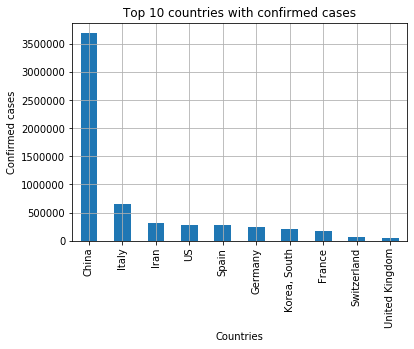

In [9]:
plt.subplot(1,1,1)
train.groupby('Country_Region')['ConfirmedCases'].sum().nlargest(10).plot(kind = 'bar',
                                                                         grid = True)
plt.title('Top 10 countries with confirmed cases')
plt.xlabel('Countries')
plt.ylabel('Confirmed cases')
plt.show()


In [10]:
train.groupby('Country_Region')['Fatalities'].sum().nlargest(10)

Country_Region
China             125987.0
Italy              54359.0
Iran               18947.0
Spain              16111.0
France              6164.0
US                  3953.0
United Kingdom      2325.0
Korea, South        1803.0
Netherlands         1538.0
Germany              881.0
Name: Fatalities, dtype: float64

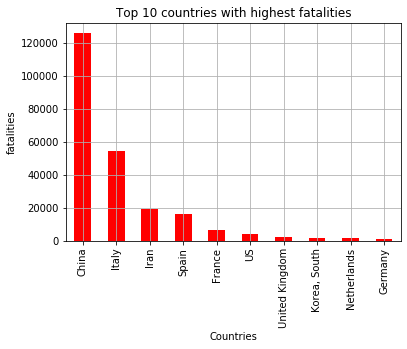

In [11]:
plt.subplot(1,1,1)
train.groupby('Country_Region')['Fatalities'].sum().nlargest(10).plot(kind = 'bar',
                                                                         grid = True,
                                                                     color = 'red')
plt.title('Top 10 countries with highest fatalities')
plt.xlabel('Countries')
plt.ylabel('fatalities')
plt.show()



In [12]:
Nigeria = train.loc[train.Country_Region == 'Nigeria']
Nigeria.head()

,Id,Country_Region,Province_State,Date,ConfirmedCases,Fatalities,Dates,Year,Month,Week,Name of month,Week_day_name,Day_of_year
11520,18001,Nigeria,NaN,2020-01-22,0.0,0.0,2020-01-22,2020,1,4,January,Wednesday,22
11521,18002,Nigeria,NaN,2020-01-23,0.0,0.0,2020-01-23,2020,1,4,January,Thursday,23
11522,18003,Nigeria,NaN,2020-01-24,0.0,0.0,2020-01-24,2020,1,4,January,Friday,24
11523,18004,Nigeria,NaN,2020-01-25,0.0,0.0,2020-01-25,2020,1,4,January,Saturday,25
11524,18005,Nigeria,NaN,2020-01-26,0.0,0.0,2020-01-26,2020,1,4,January,Sunday,26


In [13]:
Nigeria.groupby('Month')['ConfirmedCases', 'Fatalities'].sum()

,ConfirmedCases,Fatalities
Month,,
1,0.0,0.0
2,2.0,0.0
3,242.0,3.0


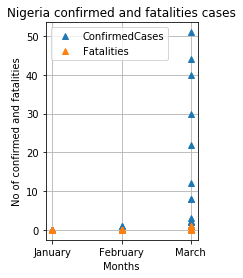

In [14]:
plt.subplot(1,2,1)
plt.plot(Nigeria['Name of month'], Nigeria.ConfirmedCases , '^') and plt.plot(Nigeria['Name of month']
                                                                              ,Nigeria['Fatalities'],
                                                                              '^')
plt.title('Nigeria confirmed and fatalities cases')
plt.xlabel('Months')
plt.ylabel('No of confirmed and fatalities')
plt.grid()
plt.legend(["ConfirmedCases", "Fatalities"], )
plt.show()

In [15]:
Nigeria.groupby('Week')['ConfirmedCases','Fatalities'].sum()

,ConfirmedCases,Fatalities
Week,,
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,3.0,0.0
10,7.0,0.0
11,14.0,0.0
12,85.0,0.0


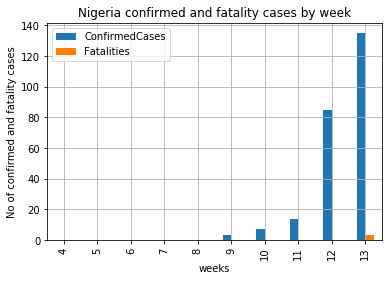

In [16]:
Nigeria.groupby('Week')['ConfirmedCases','Fatalities'].sum().plot(kind = 'bar', grid = True)
plt.title('Nigeria confirmed and fatality cases by week')
plt.xlabel('weeks')
plt.ylabel('No of confirmed and fatality cases')
plt.legend()
plt.show()

In [17]:
Nigeria.groupby('Day_of_year')['ConfirmedCases', 'Fatalities'].sum()

,ConfirmedCases,Fatalities
Day_of_year,,
22,0.0,0.0
23,0.0,0.0
24,0.0,0.0
25,0.0,0.0
26,0.0,0.0
27,0.0,0.0
28,0.0,0.0
29,0.0,0.0
30,0.0,0.0


In [18]:
Nigeria.groupby('Day_of_year')['ConfirmedCases', 'Fatalities'].sum()

,ConfirmedCases,Fatalities
Day_of_year,,
22,0.0,0.0
23,0.0,0.0
24,0.0,0.0
25,0.0,0.0
26,0.0,0.0
27,0.0,0.0
28,0.0,0.0
29,0.0,0.0
30,0.0,0.0
